In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import scipy as scp

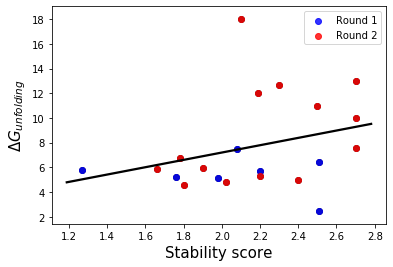

Pearson R: 0.30 p-val: 0.182


In [3]:
rd1 = ["BBM2nHm0111",
"BBM2nHm0481",
"BBM2nHm0589",
"BBMHCYm0000",
"BBMHCYm0098",
"BBMHCYm0142",
"BB47nHm0104"]
rd2 = ["IPQZYEHY (MC6)",
"PVNDHOOV (MC9)",
"QLNTLIPS (MC10)",
"BMZQQOSL (MC2_1)",
"CFRZAXWD (MC2_2)",
"CGBTHRRH (MC2_3)",
"CQXWMZNN (MC2_4)",
"JZXIQIRH (MC2_7)",
"WMNMRJMU (MC2_12)",
"KVGAMRYX  (CAV1)",
"VMXPYKBP (CAV6)",
"CLYISCOE (POK3)",
"UZNDBWRV (POK10)",
"XXUZVSNH (POK11)"]
data = {"BBM2nHm0111":{"DG":-5.71,"ss":2.2},\
"BBM2nHm0481":{"DG":-2.46,"ss":2.51},\
"BBM2nHm0589":{"DG":-6.42,"ss":2.51},\
"BBMHCYm0000":{"DG":-5.24,"ss":1.76},\
"BBMHCYm0098":{"DG":-5.82,"ss":1.27},\
"BBMHCYm0142":{"DG":-5.13,"ss":1.98},\
"BB47nHm0104":{"DG":-7.52,"ss":2.08},\
"IPQZYEHY (MC6)":{"DG":-18,"ss":2.1},\
"PVNDHOOV (MC9)":{"DG":-4.6,"ss":1.8},\
"QLNTLIPS (MC10)":{"DG":-13,"ss":2.7},\
"BMZQQOSL (MC2_1)":{"DG":-12,"ss":2.19},\
"CFRZAXWD (MC2_2)":{"DG":-5.3,"ss":2.2},\
"CGBTHRRH (MC2_3)":{"DG":-7.6,"ss":2.7},\
"CQXWMZNN (MC2_4)":{"DG":-5,"ss":2.4},\
"JZXIQIRH (MC2_7)":{"DG":-10,"ss":2.7},\
"WMNMRJMU (MC2_12)":{"DG":-11,"ss":2.5},\
"KVGAMRYX  (CAV1)":{"DG":-4.78,"ss":2.02},\
"VMXPYKBP (CAV6)":{"DG":-12.7,"ss":2.3},\
"CLYISCOE (POK3)":{"DG":-5.83,"ss":1.66},\
"UZNDBWRV (POK10)":{"DG":-5.95,"ss":1.90},\
"XXUZVSNH (POK11)":{"DG":-6.75,"ss":1.78}}
df = pd.DataFrame.from_dict(data,orient='index')
fig1 = sns.regplot(df.ss,df.DG*-1,ci=None,color='k')
sns.regplot(df.ss.loc[rd1],df.DG.loc[rd1]*-1,ci=None,fit_reg=False,color='b',label='Round 1')
sns.regplot(df.ss.loc[rd2],df.DG.loc[rd2]*-1,ci=None,fit_reg=False,color='r',label='Round 2')
fig1.set_ylabel(r"$\Delta G_{unfolding}$", fontsize=15)
fig1.set_xlabel('Stability score', fontsize=15)
plt.legend()
plt.show()
print("Pearson R: %0.2f p-val: %0.3f"%scp.stats.pearsonr(df.ss,df.DG*-1))

### New unfolded state model data

In [5]:
features_df = pd.read_csv('./all_new_des_features_saved_regenerated.csv',index_col=0)
Stability_df = pd.read_csv('./chip12_comp_USM_n_stability.csv',index_col=1)

In [8]:
features_df.index = [ i.split('_')[0] for i in features_df.index ]

Stability_df_chip2 = Stability_df.where(Stability_df.chip_order == 'chip2').dropna()
Stability_df_chip2_high_conf = Stability_df_chip2.where(Stability_df_chip2.ec50_t_width < 2.0 ).dropna()\
                               .where(Stability_df_chip2.ec50_c_width < 2.0 ).dropna()
Stability_df_chip2_high_conf['stability_score'] = \
                       np.log10(3)*np.minimum(Stability_df_chip2_high_conf.stabilityscore_c_MGM.values,\
                       Stability_df_chip2_high_conf.stabilityscore_t_MGM.values)

controls = ['BBM1pem','BBMHCYm',\
           'BB47nHm','BBM1pam',\
           'BB45CHm','BBM1TPm',\
           'BB47CHm','BBM2nHm',\
           'BBM1nHm','BB45nHm']
Stability_df_clean = Stability_df_chip2_high_conf
renaming_dict = {'sc':'scrambles','tl':'trp_ctrl','gr':'gly_ctrl'}
Stability_df_clean['subfam'] = np.array([ renaming_dict[i[:2]] if i[:2] in renaming_dict.keys() else 'control' if (i[:7] in controls) else 'design' for i in Stability_df_clean.index])

features_clean = features_df[[i for i in features_df.columns if i!='stability_score']].loc[features_df.index.intersection(Stability_df_clean.index)]
features_clean['subfam'] = Stability_df_clean.loc[Stability_df_clean.index.intersection(features_clean.index)]['subfam'].values
features_clean['stability_score'] = Stability_df_clean.loc[features_clean.index].stability_score.values


Stability_df_chip1 = Stability_df.where(Stability_df.chip_order == 'chip1').dropna()
Stability_df_chip1_high_conf = Stability_df_chip1.where(Stability_df_chip1.ec50_t_width < 2.0 ).dropna()\
                               .where(Stability_df_chip1.ec50_c_width < 2.0 ).dropna()
Stability_df_chip1_high_conf['stability_score'] = \
                       np.log10(3)*np.minimum(Stability_df_chip1_high_conf.stabilityscore_c_MGM.values,\
                       Stability_df_chip1_high_conf.stabilityscore_t_MGM.values)



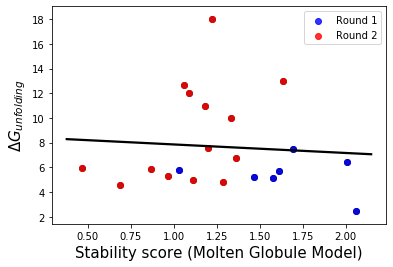

Pearson R: -0.07 p-val: 0.753


In [9]:
rd1 = ["BBM2nHm0111",
"BBM2nHm0481",
"BBM2nHm0589",
"BBMHCYm0000",
"BBMHCYm0098",
"BBMHCYm0142",
"BB47nHm0104"]
rd2 = ["IPQZYEHY (MC6)",
"PVNDHOOV (MC9)",
"QLNTLIPS (MC10)",
"BMZQQOSL (MC2_1)",
"CFRZAXWD (MC2_2)",
"CGBTHRRH (MC2_3)",
"CQXWMZNN (MC2_4)",
"JZXIQIRH (MC2_7)",
"WMNMRJMU (MC2_12)",
"KVGAMRYX  (CAV1)",
"VMXPYKBP (CAV6)",
"CLYISCOE (POK3)",
"UZNDBWRV (POK10)",
"XXUZVSNH (POK11)"]
data = {"BBM2nHm0111":{"DG":-5.71,"ss":Stability_df_chip1_high_conf.loc['BBM2nHm0111'].stability_score},\
"BBM2nHm0481":{"DG":-2.46,"ss":Stability_df_chip1_high_conf.loc['BBM2nHm0481'].stability_score},\
"BBM2nHm0589":{"DG":-6.42,"ss":Stability_df_chip1_high_conf.loc['BBM2nHm0589'].stability_score},\
"BBMHCYm0000":{"DG":-5.24,"ss":Stability_df_chip1_high_conf.loc['BBMHCYm0000'].stability_score},\
"BBMHCYm0098":{"DG":-5.82,"ss":Stability_df_chip1_high_conf.loc['BBMHCYm0098'].stability_score},\
"BBMHCYm0142":{"DG":-5.13,"ss":Stability_df_chip1_high_conf.loc['BBMHCYm0142'].stability_score},\
"BB47nHm0104":{"DG":-7.52,"ss":Stability_df_chip1_high_conf.loc['BB47nHm0104'].stability_score},\
"IPQZYEHY (MC6)":{"DG":-18,"ss":Stability_df_chip2_high_conf.loc['IPQZYEHY'].stability_score},\
"PVNDHOOV (MC9)":{"DG":-4.6,"ss":Stability_df_chip2_high_conf.loc['PVNDHOOV'].stability_score},\
"QLNTLIPS (MC10)":{"DG":-13,"ss":Stability_df_chip2_high_conf.loc['QLNTLIPS'].stability_score},\
"BMZQQOSL (MC2_1)":{"DG":-12,"ss":Stability_df_chip2_high_conf.loc['BMZQQOSL'].stability_score},\
"CFRZAXWD (MC2_2)":{"DG":-5.3,"ss":Stability_df_chip2_high_conf.loc['CFRZAXWD'].stability_score},\
"CGBTHRRH (MC2_3)":{"DG":-7.6,"ss":Stability_df_chip2_high_conf.loc['CGBTHRRH'].stability_score},\
"CQXWMZNN (MC2_4)":{"DG":-5,"ss":Stability_df_chip2_high_conf.loc['CQXWMZNN'].stability_score},\
"JZXIQIRH (MC2_7)":{"DG":-10,"ss":Stability_df_chip2_high_conf.loc['JZXIQIRH'].stability_score},\
"WMNMRJMU (MC2_12)":{"DG":-11,"ss":Stability_df_chip2_high_conf.loc['WMNMRJMU'].stability_score},\
"KVGAMRYX  (CAV1)":{"DG":-4.78,"ss":Stability_df_chip2_high_conf.loc['KVGAMRYX'].stability_score},\
"VMXPYKBP (CAV6)":{"DG":-12.7,"ss":Stability_df_chip2_high_conf.loc['VMXPYKBP'].stability_score},\
"CLYISCOE (POK3)":{"DG":-5.83,"ss":Stability_df_chip2_high_conf.loc['CLYISCOE'].stability_score},\
"UZNDBWRV (POK10)":{"DG":-5.95,"ss":Stability_df_chip2_high_conf.loc['UZNDBWRV'].stability_score},\
"XXUZVSNH (POK11)":{"DG":-6.75,"ss":Stability_df_chip2_high_conf.loc['XXUZVSNH'].stability_score}}
df = pd.DataFrame.from_dict(data,orient='index')
fig1 = sns.regplot(df.ss,df.DG*-1,ci=None,color='k')
sns.regplot(df.ss.loc[rd1],df.DG.loc[rd1]*-1,ci=None,fit_reg=False,color='b',label='Round 1')
sns.regplot(df.ss.loc[rd2],df.DG.loc[rd2]*-1,ci=None,fit_reg=False,color='r',label='Round 2')
fig1.set_ylabel(r"$\Delta G_{unfolding}$", fontsize=15)
fig1.set_xlabel('Stability score (Molten Globule Model)', fontsize=15)
plt.legend()
plt.show()
print("Pearson R: %0.2f p-val: %0.3f"%scp.stats.pearsonr(df.ss,df.DG*-1))

In [10]:
Tested = ['APXUALRM',
'CNOCZZYN',
'IPQZYEHY',
'MQGQLKLY',
'NPHNECCY',
'PVNDHOOV',
'QLNTLIPS',
'QPAJWNJL',
'RWBLOJXV',
'BMZQQOSL',
'CFRZAXWD',
'CGBTHRRH',
'DEZFDZKN',
'CQXWMZNN',
'DFEBCGLM',
'JZXIQIRH',
'ODCAZTIO',
'UTEWRJFN',
'WMNMRJMU',
'KVGAMRYX',
'MTNNCMGU',
'OBJWKGFB',
'QZFIQMXG',
'VJZGDPLE',
'VMXPYKBP',
'AFUBUPIX',
'BBJJQJEH',
'CLYISCOE',
'ERSKGIDY',
'GHJPMEUD',
'KVTSDNGQ',
'LQDGTTOJ',
'MYWJWGMP',
'UBQRFAXL',
'UZNDBWRV',
'XXUZVSNH',
'ZSETTDDT']
Results = [0,
0,
1,
0,
0,
1,
1,
0,
0,
1,
1,
1,
0,
1,
0,
1,
0,
0,
1,
0,
0,
0,
0,
0,
1,
0,
0,
1,
0,
0,
0,
0,
0,
0,
1,
1,
0]
Stability_scores_tested = np.log10(3**Stability_df_chip2.loc[Tested].stabilityscore_USM.values)
Stability_scores_tested_MGM = np.log10(3**Stability_df_chip2.loc[Tested].stabilityscore_MGM.values)

In [12]:
import sklearn
from sklearn.metrics import roc_curve, roc_auc_score, auc

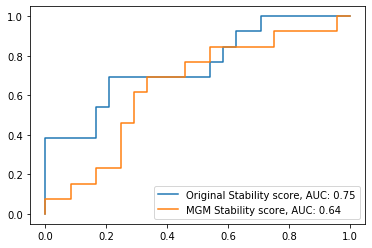

In [13]:
fpr, tpr, thresholds = roc_curve(Results, Stability_scores_tested, pos_label=None)
nfpr, ntpr, nthresholds = roc_curve(Results, Stability_scores_tested_MGM, pos_label=None)

plt.plot(fpr,tpr,label="Original Stability score, AUC: %0.2f"%(roc_auc_score(Results, Stability_scores_tested)))
plt.plot(nfpr,ntpr,label="MGM Stability score, AUC: %0.2f"%(roc_auc_score(Results, Stability_scores_tested_MGM)))
plt.legend()
plt.show()